In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
amazon_1 = pd.read_csv("amazon_1.csv")

In [4]:
amazon_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10000 non-null  object 
 1   product_name                                 10000 non-null  object 
 2   manufacturer                                 9993 non-null   object 
 3   price                                        8565 non-null   object 
 4   number_available_in_stock                    7500 non-null   object 
 5   number_of_reviews                            9982 non-null   object 
 6   number_of_answered_questions                 9235 non-null   float64
 7   average_review_rating                        9982 non-null   object 
 8   amazon_category_and_sub_category             9310 non-null   object 
 9   customers_who_bought_this_item_also_bought   8938 non-null   object 
 10 

In [5]:
amazon_1.isnull().sum()

uniq_id                                           0
product_name                                      0
manufacturer                                      7
price                                          1435
number_available_in_stock                      2500
number_of_reviews                                18
number_of_answered_questions                    765
average_review_rating                            18
amazon_category_and_sub_category                690
customers_who_bought_this_item_also_bought     1062
description                                     651
product_information                              58
product_description                             651
items_customers_buy_after_viewing_this_item    3065
customer_questions_and_answers                 9086
customer_reviews                                 21
sellers                                        3082
dtype: int64

In [6]:
amazon_1.dtypes

uniq_id                                         object
product_name                                    object
manufacturer                                    object
price                                           object
number_available_in_stock                       object
number_of_reviews                               object
number_of_answered_questions                   float64
average_review_rating                           object
amazon_category_and_sub_category                object
customers_who_bought_this_item_also_bought      object
description                                     object
product_information                             object
product_description                             object
items_customers_buy_after_viewing_this_item     object
customer_questions_and_answers                  object
customer_reviews                                object
sellers                                         object
dtype: object

In [7]:
amazon_1.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


In [8]:
amazon_1.drop(['uniq_id','description','product_information','product_description'],axis = 1,inplace = True)

In [9]:
amazon_1.head()

,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


In [10]:
amazon_1.tail()

,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
9995,Batman 1966 TV Series Action Figures - The Rid...,Mattel,£22.95,5 new,3,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,http://www.amazon.co.uk/Batman-1966-Series-Act...,NaN,NaN,Realistic // 5.0 // 31 Mar. 2014 // By\n \n...,"{""seller""=>[{""Seller_name_1""=>""Star Action Fig..."
9996,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,£39.99,NaN,1,3.0,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Storm-Trooper-Costume-...,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,... what I see my grandson us going to have fu...,NaN
9997,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,£43.99,3 new,1,3.0,5.0 out of 5 stars,Novelty & Special Use > Novelty > Accessories ...,NaN,http://www.amazon.co.uk/Olde-Scotland-Yard-Ltd...,NaN,Five Stars // 5.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>[{""Seller_name_1""=>""YUK"", ""Seller_p..."
9998,Justice League of America Series 3 Green Lante...,DC Comics,£49.81,3 new,1,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,NaN,NaN,NaN,The best sculpt in a while // 5.0 // 13 May 20...,"{""seller""=>[{""Seller_name_1""=>""Smaller World F..."
9999,Star Wars 1/72 Y-Wing Starfighter,Bandai,£21.20,31 new,11,3.0,4.5 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Bandai-Star-Wars-Fight...,NaN,NaN,Gold leader // 5.0 // 31 Aug. 2015 // By\n ...,NaN


In [11]:
def extract_number_string(x):
    if pd.isnull(x):
        return np.NaN, np.NaN
    try:
        vv = x.split('\xa0')
        return int(vv[0]), vv[1]
    except ValueError:
        return np.NaN, np.NaN

amazon_1['stock_number'], amazon_1['stock_class'] = amazon_1['number_available_in_stock'].apply(extract_number_string).str

In [12]:
amazon_1.head()

,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,stock_number,stock_class
0,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",5.0,new
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ...",NaN,NaN
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel...",2.0,new
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN,NaN,NaN
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN,NaN,NaN


In [13]:
amazon_1["stock_class"].value_counts()

new            7324
used            161
collectible      13
refurbished       2
Name: stock_class, dtype: int64

In [14]:
amazon_1.drop('number_available_in_stock',inplace = True,axis = 1)

In [15]:
amazon_1.head()

,product_name,manufacturer,price,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,stock_number,stock_class
0,Hornby 2014 Catalogue,Hornby,£3.42,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",5.0,new
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ...",NaN,NaN
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel...",2.0,new
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN,NaN,NaN
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN,NaN,NaN


In [16]:
amazon_1["average_review_rating"]= amazon_1["average_review_rating"].values.astype('str')

In [17]:
def review(rating):
    output_string = re.sub(r' out of 5 stars','',rating)
    return output_string

In [18]:
amazon_1['avg_rating_out_of_5'] = amazon_1['average_review_rating'].apply(review) 

In [19]:
amazon_1.head()

,product_name,manufacturer,price,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,stock_number,stock_class,avg_rating_out_of_5
0,Hornby 2014 Catalogue,Hornby,£3.42,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",5.0,new,4.9
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ...",NaN,NaN,4.5
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel...",2.0,new,3.9
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN,NaN,NaN,5.0
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN,NaN,NaN,4.7


In [20]:
amazon_1.drop('average_review_rating',axis = 1, inplace = True)

In [21]:
amazon_1.head()

,product_name,manufacturer,price,number_of_reviews,number_of_answered_questions,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,stock_number,stock_class,avg_rating_out_of_5
0,Hornby 2014 Catalogue,Hornby,£3.42,15,1.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",5.0,new,4.9
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,2,1.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ...",NaN,NaN,4.5
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,17,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel...",2.0,new,3.9
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,1,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN,NaN,NaN,5.0
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,3,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN,NaN,NaN,4.7


In [22]:
amazon_1[['customers_who_bought_this_item_also_bought']]

,customers_who_bought_this_item_also_bought
0,http://www.amazon.co.uk/Hornby-R8150-Catalogue...
1,http://www.amazon.co.uk/Christmas-Holiday-Expr...
2,http://www.amazon.co.uk/Classic-Train-Lights-B...
3,NaN
4,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...
...,...
9995,http://www.amazon.co.uk/Batman-1966-Series-Act...
9996,http://www.amazon.co.uk/Storm-Trooper-Costume-...
9997,NaN
9998,NaN


In [23]:
amazon_1["customers_who_bought_this_item_also_bought"]= amazon_1["customers_who_bought_this_item_also_bought"].values.astype('str')

In [24]:
amazon_1.head()

,product_name,manufacturer,price,number_of_reviews,number_of_answered_questions,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,stock_number,stock_class,avg_rating_out_of_5
0,Hornby 2014 Catalogue,Hornby,£3.42,15,1.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",5.0,new,4.9
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,2,1.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ...",NaN,NaN,4.5
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,17,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel...",2.0,new,3.9
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,1,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,nan,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN,NaN,NaN,5.0
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,3,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN,NaN,NaN,4.7


In [25]:
amazon_1["price"]= amazon_1["price"].values.astype('str')

In [26]:
def remove_currency(currency):
    output_string = re.sub(r'£','',currency)
    return output_string

In [27]:
amazon_1['price_in_£'] = amazon_1['price'].apply(remove_currency)

In [28]:
amazon_1.head()

,product_name,manufacturer,price,number_of_reviews,number_of_answered_questions,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,stock_number,stock_class,avg_rating_out_of_5,price_in_£
0,Hornby 2014 Catalogue,Hornby,£3.42,15,1.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",5.0,new,4.9,3.42
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,2,1.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ...",NaN,NaN,4.5,16.99
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,17,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel...",2.0,new,3.9,9.99
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,1,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,nan,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN,NaN,NaN,5.0,39.99
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,3,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN,NaN,NaN,4.7,32.19


In [29]:
amazon_1.drop('price',axis = 1, inplace = True)

In [30]:
amazon_1.head()

,product_name,manufacturer,number_of_reviews,number_of_answered_questions,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,stock_number,stock_class,avg_rating_out_of_5,price_in_£
0,Hornby 2014 Catalogue,Hornby,15,1.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",5.0,new,4.9,3.42
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,2,1.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ...",NaN,NaN,4.5,16.99
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,17,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel...",2.0,new,3.9,9.99
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,1,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,nan,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN,NaN,NaN,5.0,39.99
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,3,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN,NaN,NaN,4.7,32.19


In [31]:
def clean_customer(bought):
    output_string = re.sub(r'http://www.amazon.co.uk/','',bought)
    return output_string

In [32]:
amazon_1['customer_also_bought'] = amazon_1['customers_who_bought_this_item_also_bought'].apply(clean_customer)

In [33]:
amazon_1.head()

,product_name,manufacturer,number_of_reviews,number_of_answered_questions,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,stock_number,stock_class,avg_rating_out_of_5,price_in_£,customer_also_bought
0,Hornby 2014 Catalogue,Hornby,15,1.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",5.0,new,4.9,3.42,Hornby-R8150-Catalogue-2015/dp/B00S9SUUBE | Ho...
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,2,1.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ...",NaN,NaN,4.5,16.99,Christmas-Holiday-Express-Festive-Train-Set-To...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,17,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel...",2.0,new,3.9,9.99,Classic-Train-Lights-Battery-Operated/dp/B0041...
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,1,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,nan,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN,NaN,NaN,5.0,39.99,nan
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,3,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN,NaN,NaN,4.7,32.19,Hornby-R6367-RailRoad-Gauge-Rolling/dp/B000WDW...


In [34]:
amazon_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   product_name                                 10000 non-null  object 
 1   manufacturer                                 9993 non-null   object 
 2   number_of_reviews                            9982 non-null   object 
 3   number_of_answered_questions                 9235 non-null   float64
 4   amazon_category_and_sub_category             9310 non-null   object 
 5   customers_who_bought_this_item_also_bought   10000 non-null  object 
 6   items_customers_buy_after_viewing_this_item  6935 non-null   object 
 7   customer_questions_and_answers               914 non-null    object 
 8   customer_reviews                             9979 non-null   object 
 9   sellers                                      6918 non-null   object 
 10 

In [35]:
amazon_1["avg_rating_out_of_5"]= amazon_1["avg_rating_out_of_5"].values.astype('float')

In [36]:
bins = [1.0,2.0,3.0,4.0,4.5,5]
labels = ['Very Dissatisfied','Dissatisfied','Average','Satisfied','Very Satisfied']
amazon_1['Avg_Rating'] = pd.cut(amazon_1['avg_rating_out_of_5'],bins,labels=labels)

In [37]:
amazon_1.head()

,product_name,manufacturer,number_of_reviews,number_of_answered_questions,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,stock_number,stock_class,avg_rating_out_of_5,price_in_£,customer_also_bought,Avg_Rating
0,Hornby 2014 Catalogue,Hornby,15,1.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",5.0,new,4.9,3.42,Hornby-R8150-Catalogue-2015/dp/B00S9SUUBE | Ho...,Very Satisfied
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,2,1.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ...",NaN,NaN,4.5,16.99,Christmas-Holiday-Express-Festive-Train-Set-To...,Satisfied
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,17,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel...",2.0,new,3.9,9.99,Classic-Train-Lights-Battery-Operated/dp/B0041...,Average
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,1,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,nan,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN,NaN,NaN,5.0,39.99,nan,Very Satisfied
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,3,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN,NaN,NaN,4.7,32.19,Hornby-R6367-RailRoad-Gauge-Rolling/dp/B000WDW...,Very Satisfied


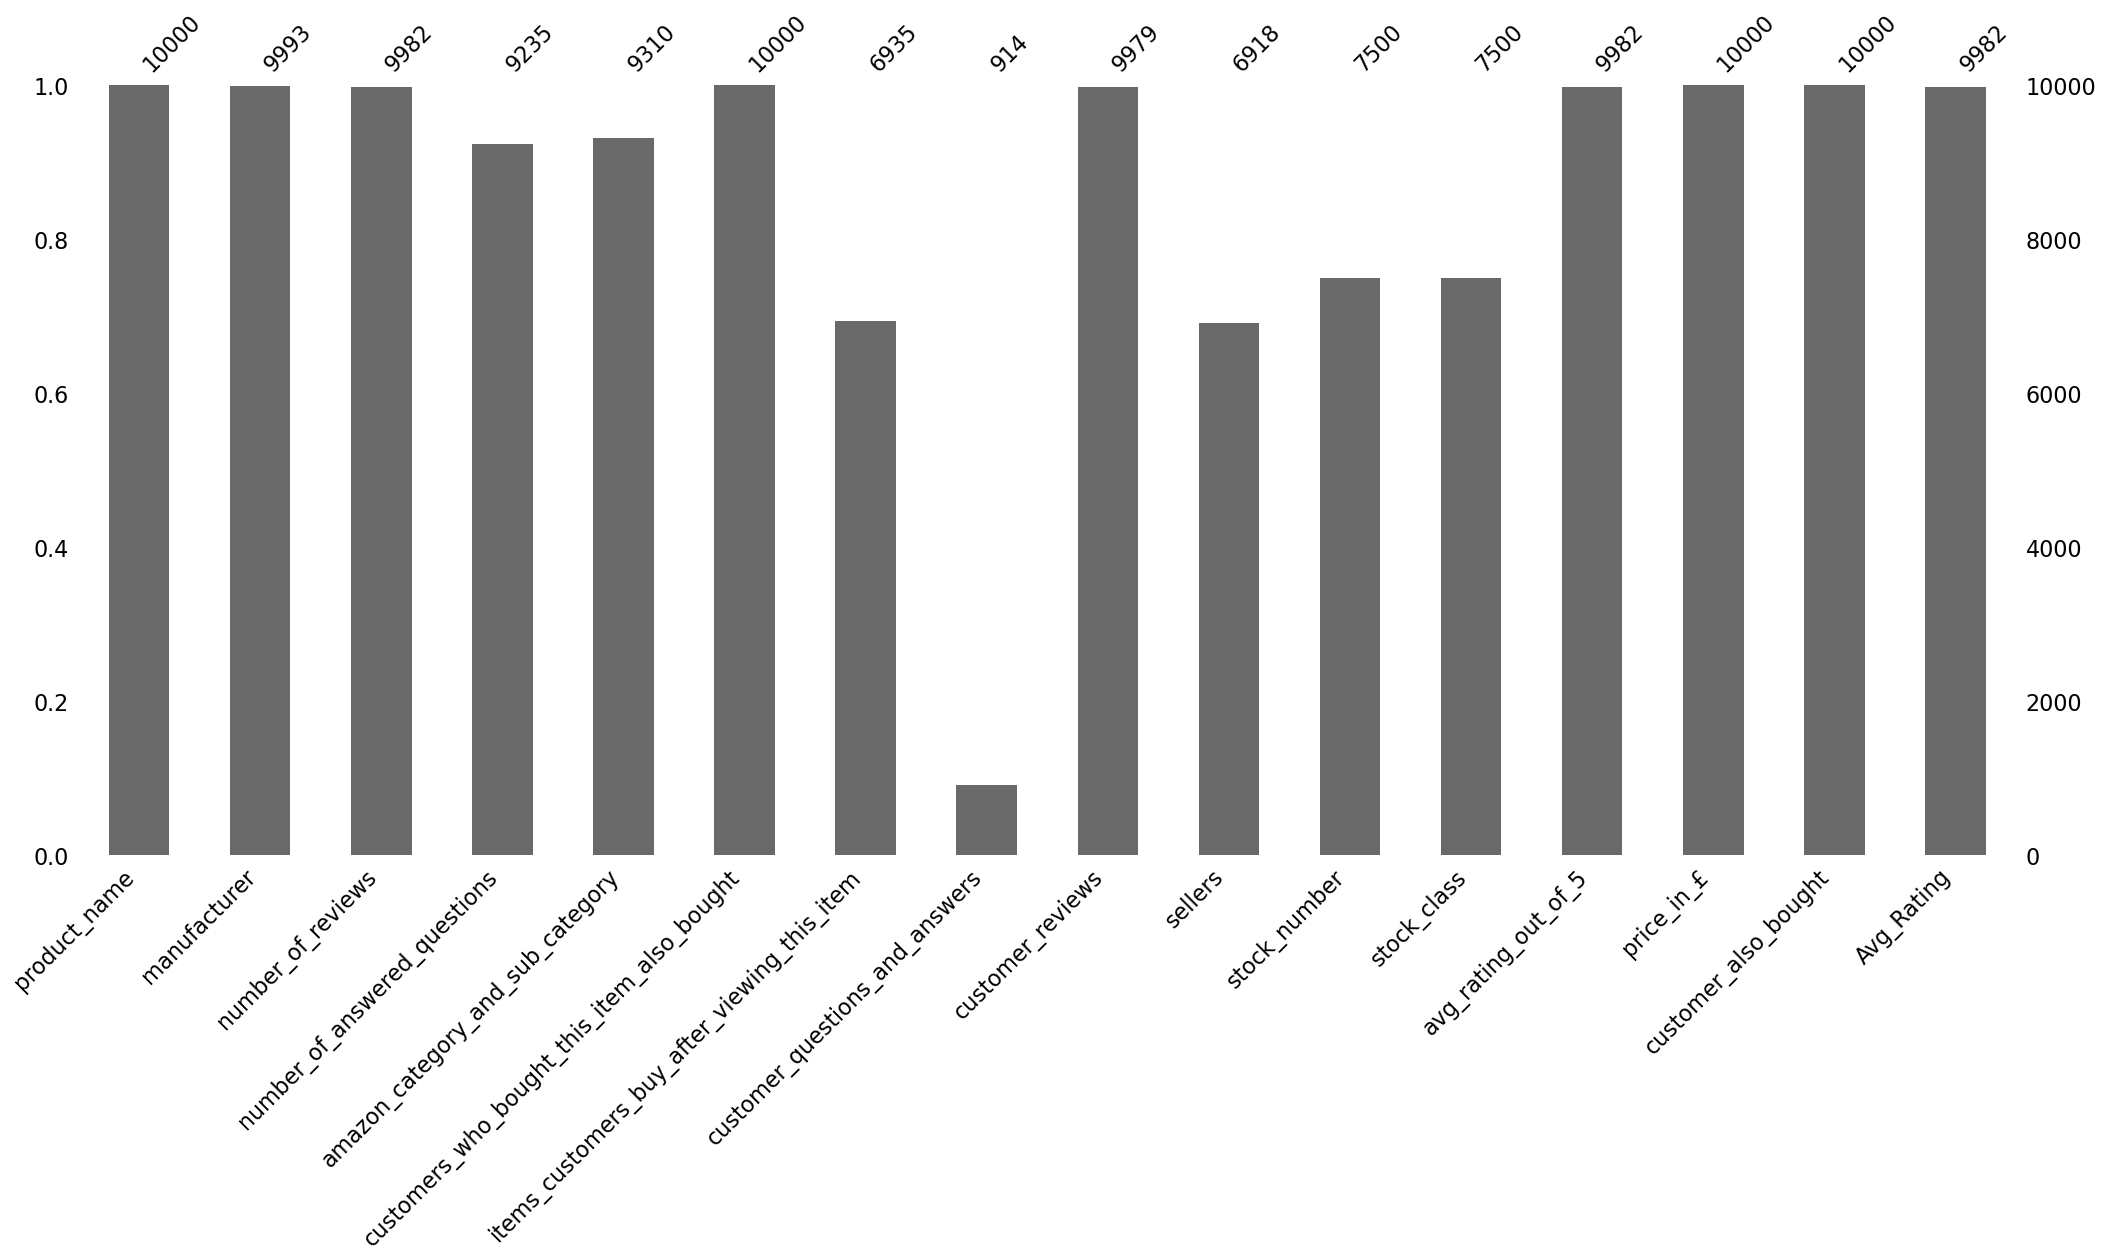

In [38]:
msno.bar(amazon_1)
plt.show()

In [39]:
amazon_1.value_counts('manufacturer')

manufacturer
LEGO              171
Disney            167
Oxford Diecast    156
Playmobil         147
Star Wars         120
                 ... 
Jack Daniel         1
JYW Global          1
JXD                 1
JR Propo            1
|MFG                1
Length: 2651, dtype: int64

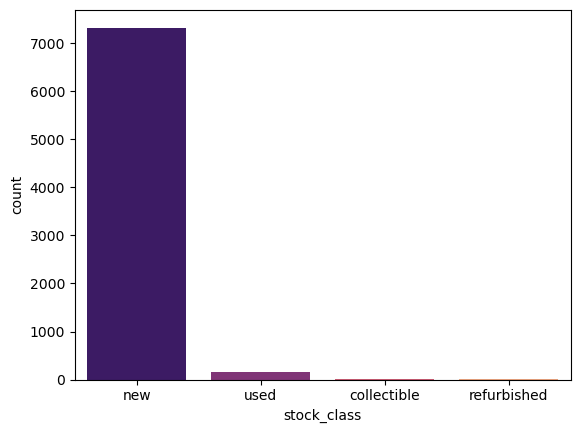

In [40]:
sns.countplot(x = 'stock_class',data = amazon_1,palette = 'magma')
plt.show()

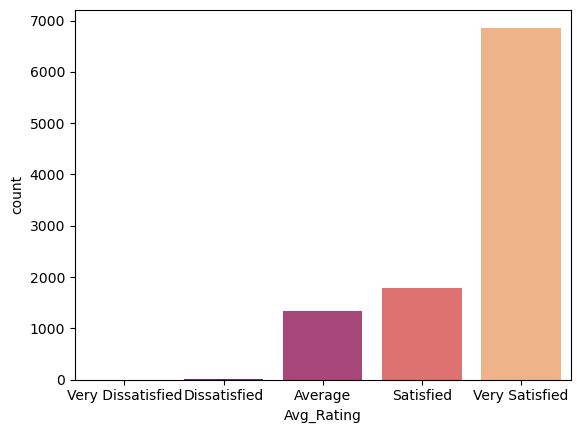

In [41]:
sns.countplot(x = 'Avg_Rating',data = amazon_1,palette = 'magma')
plt.show()

In [42]:
manf_stock = pd.DataFrame(amazon_1.groupby('manufacturer')['stock_number'].count())

In [43]:
manf_stock

,stock_number
manufacturer,
101,1
13,1
16th Birthday 16th Foil Banner - 9ft,1
1st birthday,2
2-in-1 Chess & Draughts,0
...,...
woooow doll,0
xs-party,1
yugioh,4


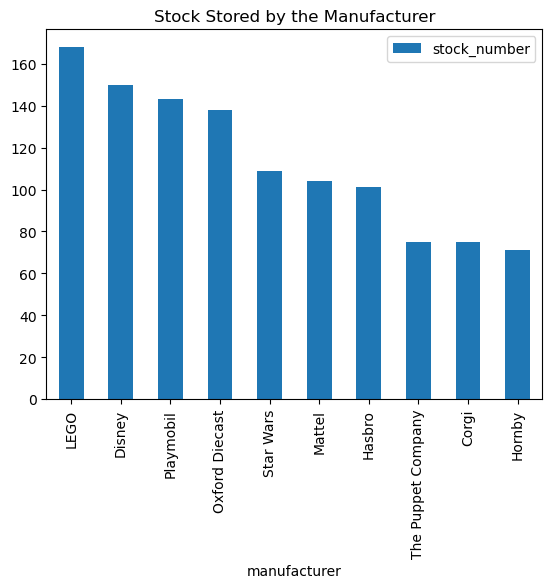

In [44]:
manf_stock.sort_values(by = 'stock_number',ascending = False).head(10).plot(kind = 'bar')
plt.title("Stock Stored by the Manufacturer")
plt.show()

In [45]:
manf_rating = pd.DataFrame(amazon_1.groupby('manufacturer')['avg_rating_out_of_5'].mean())

In [46]:
manf_rating

,avg_rating_out_of_5
manufacturer,
101,4.5
13,5.0
16th Birthday 16th Foil Banner - 9ft,5.0
1st birthday,4.9
2-in-1 Chess & Draughts,5.0
...,...
woooow doll,5.0
xs-party,4.9
yugioh,5.0


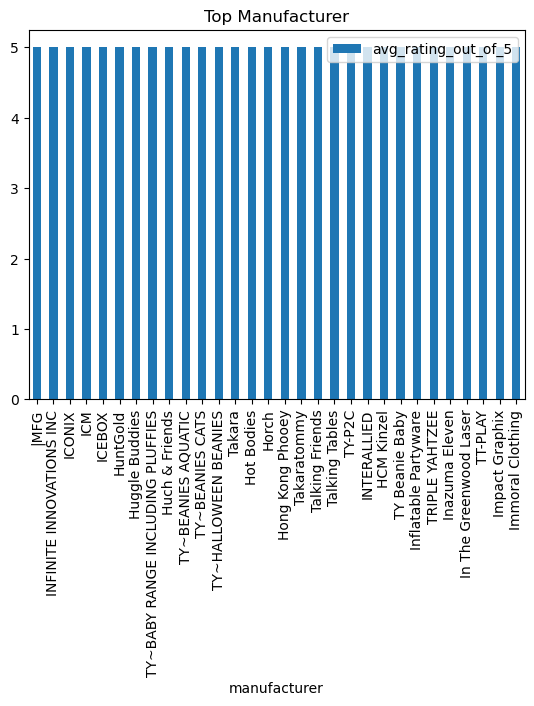

In [47]:
manf_rating.sort_values(by = 'avg_rating_out_of_5',ascending = False).head(30).plot(kind = 'bar')
plt.title("Top Manufacturer")
plt.show()

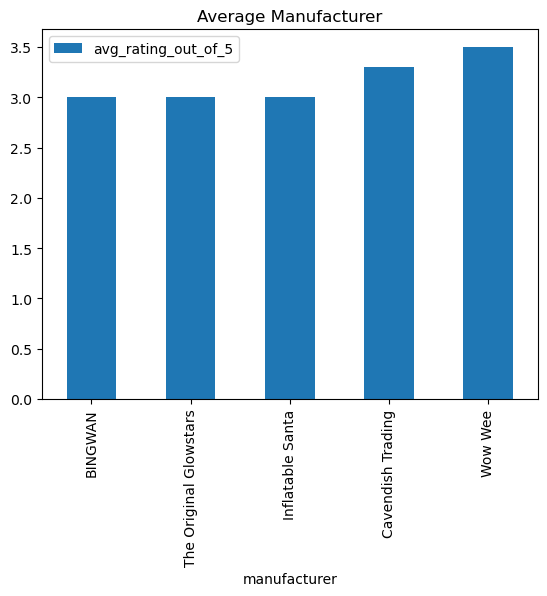

In [48]:
manf_rating.sort_values(by = 'avg_rating_out_of_5',ascending = True).head().plot(kind = 'bar')
plt.title("Average Manufacturer")
plt.show()

In [49]:
manf_price_rating = pd.DataFrame(amazon_1[['manufacturer','price_in_£','Avg_Rating']])

In [50]:
manf_price_rating.isnull().sum()

manufacturer     7
price_in_£       0
Avg_Rating      18
dtype: int64

In [51]:
manf_price_rating.dropna(axis = 0, inplace = True)

In [52]:
manf_price_rating.isnull().sum()

manufacturer    0
price_in_£      0
Avg_Rating      0
dtype: int64

In [53]:
i = manf_price_rating[(manf_price_rating['price_in_£'] == 'nan')].index
i

Int64Index([   9,   14,   15,   16,   17,   25,   27,   28,   33,   38,
            ...
            9926, 9927, 9930, 9934, 9939, 9952, 9969, 9976, 9983, 9984],
           dtype='int64', length=1430)

In [54]:
manf_price_rating.drop(i,inplace = True)

In [55]:
manf_price_rating

,manufacturer,price_in_£,Avg_Rating
0,Hornby,3.42,Very Satisfied
1,FunkyBuys,16.99,Satisfied
2,ccf,9.99,Average
3,Hornby,39.99,Very Satisfied
4,Hornby,32.19,Very Satisfied
...,...,...,...
9995,Mattel,22.95,Very Satisfied
9996,Star Wars,39.99,Average
9997,Olde Scotland Yard Ltd.,43.99,Very Satisfied
9998,DC Comics,49.81,Very Satisfied


In [56]:
cheap_manf_rating = pd.DataFrame(manf_price_rating.sort_values(['price_in_£'],ascending = True).head(10))

In [57]:
cheap_manf_rating

,manufacturer,price_in_£,Avg_Rating
6362,Partyrama,0.01,Very Satisfied
6136,Halsall,0.29,Average
1556,Just Feathers by Crazy Grans,0.37,Very Satisfied
5652,Neopets,0.38,Satisfied
3125,Unique Party,0.39,Satisfied
1613,Trade Mark Collections,0.50,Very Satisfied
2271,Tonsee®,0.55,Very Satisfied
6592,unisex party bag fillers,0.60,Satisfied
5128,Shatchi,0.64,Satisfied
1275,Just Say Beads,0.65,Satisfied


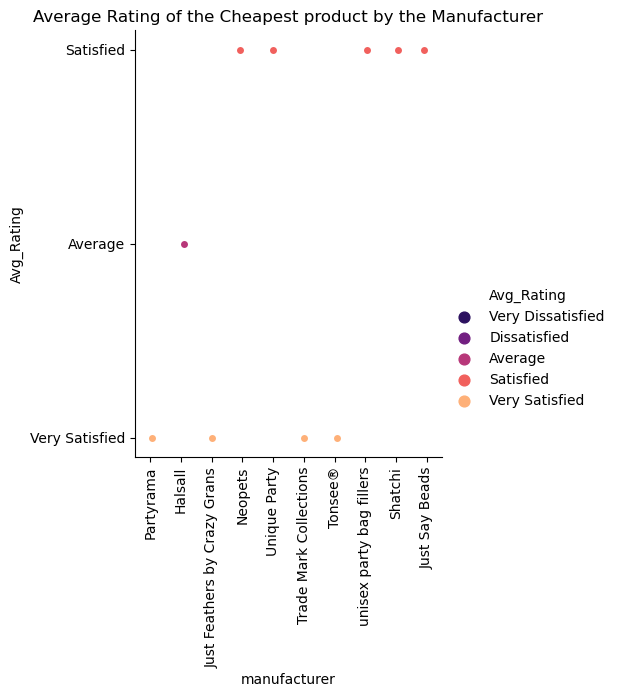

In [58]:
sns.catplot(x = 'manufacturer', y = 'Avg_Rating', hue ='Avg_Rating',palette = 'magma',data = cheap_manf_rating)
plt.title("Average Rating of the Cheapest product by the Manufacturer")
plt.xticks(rotation = 90)
plt.show()

In [59]:
expensive_manf_rating = pd.DataFrame(manf_price_rating.sort_values(['price_in_£'],ascending = False)).head(10)

In [60]:
expensive_manf_rating

,manufacturer,price_in_£,Avg_Rating
2228,DJI,995.11,Very Satisfied
5517,Millenium,99.99,Very Satisfied
8229,Power Rangers,99.99,Very Satisfied
3290,Disguise,99.99,Very Satisfied
34,Bachmann,99.95,Satisfied
3639,Trumpeter,98.99,Very Satisfied
60,Hornby,98.50,Very Satisfied
7705,AOSHIMA,98.11,Very Satisfied
8542,AUTOart,96.95,Very Satisfied
167,Tommy Tech,96.95,Very Satisfied


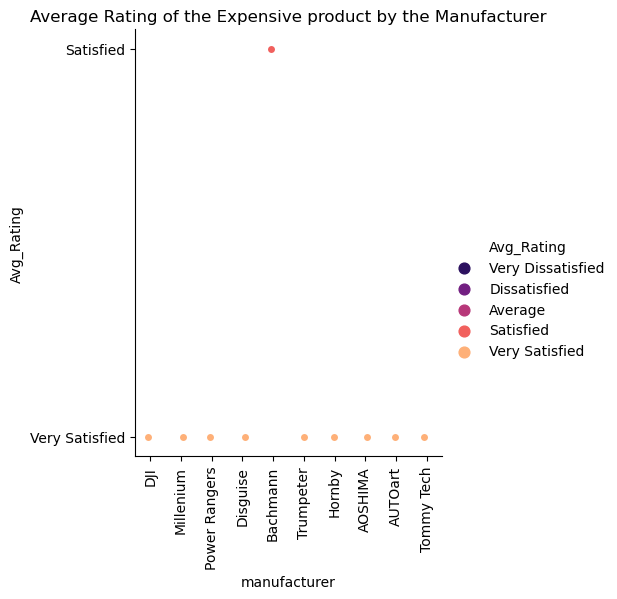

In [61]:
sns.catplot(x = 'manufacturer', y = 'Avg_Rating', hue ='Avg_Rating',palette = 'magma',data = expensive_manf_rating)
plt.title("Average Rating of the Expensive product by the Manufacturer")
plt.xticks(rotation = 90)
plt.show()

In [62]:
def cust_also_bought(string):
    result = re.split(r' \| ', string)
    return result

In [66]:
amazon_1['customer_also_bought'] = amazon_1['customer_also_bought'].apply(cust_also_bought) 

In [67]:
amazon_1.head()

,product_name,manufacturer,number_of_reviews,number_of_answered_questions,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,stock_number,stock_class,avg_rating_out_of_5,price_in_£,customer_also_bought,Avg_Rating
0,Hornby 2014 Catalogue,Hornby,15,1.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",5.0,new,4.9,3.42,"[Hornby-R8150-Catalogue-2015/dp/B00S9SUUBE, Ho...",Very Satisfied
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,2,1.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ...",NaN,NaN,4.5,16.99,[Christmas-Holiday-Express-Festive-Train-Set-T...,Satisfied
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,17,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel...",2.0,new,3.9,9.99,[Classic-Train-Lights-Battery-Operated/dp/B004...,Average
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,1,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,nan,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN,NaN,NaN,5.0,39.99,[nan],Very Satisfied
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,3,2.0,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN,NaN,NaN,4.7,32.19,[Hornby-R6367-RailRoad-Gauge-Rolling/dp/B000WD...,Very Satisfied


In [68]:
also_bought = pd.DataFrame(amazon_1[['product_name','customer_also_bought']])

In [69]:
also_bought

,product_name,customer_also_bought
0,Hornby 2014 Catalogue,"[Hornby-R8150-Catalogue-2015/dp/B00S9SUUBE, Ho..."
1,FunkyBuys® Large Christmas Holiday Express Fes...,[Christmas-Holiday-Express-Festive-Train-Set-T...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,[Classic-Train-Lights-Battery-Operated/dp/B004...
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,[nan]
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,[Hornby-R6367-RailRoad-Gauge-Rolling/dp/B000WD...
...,...,...
9995,Batman 1966 TV Series Action Figures - The Rid...,[Batman-1966-Series-Action-Figures/dp/B00C16YY...
9996,"Star Wars Costume, Kids Stormtrooper Costume S...",[Storm-Trooper-Costume-Childs-Outfit/dp/B00QKB...
9997,Defiance Lawkeeper Metal Badge Prop Replica,[nan]
9998,Justice League of America Series 3 Green Lante...,[nan]


In [70]:
also_bought['num_items_bought_with_product'] = also_bought['customer_also_bought'].apply(len)

In [71]:
also_bought.sort_values(['num_items_bought_with_product'],ascending = False)

,product_name,customer_also_bought,num_items_bought_with_product
3178,MEN'S HORROR FILM SCREAMER HALLOWEEN FANCY DRE...,[CHILDS-JOSEPH-NATIVITY-CHRISTMAS-COSTUME/dp/B...,12
3258,TAVERN WENCH ADULT FANCY DRESS COSTUME LADIES ...,"[PLUSH-COW-HOODED-PONCHO-98/dp/B017JEI43O, Hea...",12
3296,1950s Sweetheart Plus Size Womens Fancy Dress ...,"[1950s-Rock-Women-Fancy-Dress/dp/B015A2XFUY, R...",12
3321,Leg Avenue Dead Eye Dolly Fancy Dress Costume,[Leg-Avenue-Voodoo-Cutie-Costume/dp/B016IF1UTU...,12
3351,Adult Skull and Bones Morphsuit,"[Morphsuits, Morphsuits, Morphsuits, Genuine-M...",12
...,...,...,...
1760,Barbie Fairytopia 3pc Pool Set,[nan],1
1759,Happy People Speedway Friends 18554 Children's...,[nan],1
7555,James Bond 007 Die-cast Ouble Deck Bus- From L...,[Toys-corgi-definitive],1
1758,Roary the Racing Car Wheeled Big Chris Paddlin...,[nan],1


In [72]:
also_bought[also_bought['num_items_bought_with_product'] == 12]

,product_name,customer_also_bought,num_items_bought_with_product
1808,TAVERN WENCH ADULT FANCY DRESS COSTUME LADIES ...,"[Ladies-Oktoberfest, Tudor-Tavern-Wench-Female...",12
1814,HEAVY FABRIC CARDINAL FANCY DRESS COSTUME MENS...,[Boland-83852-Adult-Cardinal-Costume/dp/B00Y01...,12
1837,Mr Incredible - Adult Fancy Dress Costume,"[Mr-Incredible, DISNEY-Mr-Incredible, Fancy-Dr...",12
3178,MEN'S HORROR FILM SCREAMER HALLOWEEN FANCY DRE...,[CHILDS-JOSEPH-NATIVITY-CHRISTMAS-COSTUME/dp/B...,12
3193,Morhsuits Childrens Mr Block Head Costume,"[Morphsuits, Morphsuits, Morphsuits, Morph-Cos...",12
3235,Smiffy's Roman Warrior Deluxe Costume,[Gladiator-Costume-Express-Fancy-Dress/dp/B00G...,12
3258,TAVERN WENCH ADULT FANCY DRESS COSTUME LADIES ...,"[PLUSH-COW-HOODED-PONCHO-98/dp/B017JEI43O, Hea...",12
3263,Ladies retro go go girl dressing up 60's costu...,"[FANCY-DRESS-disco-HIPPY-RETRO/dp/B0039O75XE, ...",12
3268,Adult Little Miss Chatterbox Morph Fancy Dress...,"[Costume-Morphsuits, Costume-Morphsuits, Costu...",12
3296,1950s Sweetheart Plus Size Womens Fancy Dress ...,"[1950s-Rock-Women-Fancy-Dress/dp/B015A2XFUY, R...",12
